<a href="https://colab.research.google.com/github/YadhuKrishna2001/Social_media_analytics/blob/main/Social_media_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
this is my data

Here is all the data you need:
"Social Media Manager(Content Posting Sheet) (1).csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
I need to import the pandas library and load the provided CSV file into a pandas DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Social Media Manager(Content Posting Sheet) (1).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Social Media Manager(Content Posting Sheet) (1).csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

An error occurred: 'utf-8' codec can't decode byte 0x92 in position 1741: invalid start byte


**Reasoning**:
The previous attempt failed due to a decoding error. I'll try again with a different encoding.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Social Media Manager(Content Posting Sheet) (1).csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Social Media Manager(Content Posting Sheet) (1).csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Sr. No,Uploaded,Content Theme,Owner,Content,Collaboration Comments,Sample Post URL,Platform,Draft Content,Status,Finalized Post,Upload date,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,False,Glossary,Anay,Account Based Marketing,NaN,https://www.wonderway.io/glossary/account-base...,NaN,,Draft Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,False,AI Tools,Anay,AI sales tools - CustomGPT,NaN,https://customgpt.ai/?fpr=michel27&_gl=1%2A7u5...,NaN,NaN,Draft Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,False,Glossary,Anay,Basho Email,NaN,https://www.wonderway.io/glossary/basho-email,NaN,NaN,Draft Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,False,Tips,Anay,6 Phrases NOT to use in a Sales Deal,NaN,https://blog.hubspot.com/sales/phrases-that-wi...,NaN,NaN,Draft Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,False,Tips,Anay,"If you're in Sales, you got to watch these mov...",1. Tommy Boy\n2. Death of aa Salesperson\n3. W...,https://www.thedailysales.net/post/the-12-film...,NaN,NaN,Idea Stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration

### Subtask:
Explore the loaded DataFrame (`df`) to understand its structure, identify key variables, and check for missing values and data type inconsistencies.


**Reasoning**:
Explore the DataFrame's structure, identify key variables, check for missing values, and analyze data type consistency.



In [ ]:
# Examine DataFrame Structure
print("DataFrame Shape:", df.shape)
print("\nColumn Names and Data Types:\n", df.dtypes)

# Identify Key Variables (Assuming columns related to content performance)
potential_engagement_cols = ['Status', 'Finalized Post', 'Upload date'] # These are potential columns that might relate to user feedback, but more data would be needed for proper analysis.
print("\nPotential Engagement Columns:", potential_engagement_cols)

# Check for Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)


# Data Type Consistency (Identify potential inconsistencies)
print("\nData Type Consistency Check:")
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            pd.to_numeric(df[col], errors='raise')
            print(f"{col}: Could be numeric but is object.")
        except (ValueError, TypeError):
            pass
    elif df[col].dtype == 'float64':
        try:
            pd.to_datetime(df[col], errors='raise')
            print(f"{col}: Could be datetime but is float.")
        except (ValueError, TypeError):
            pass

DataFrame Shape: (106, 20)

Column Names and Data Types:
 Sr. No                    float64
Uploaded                     bool
Content Theme              object
Owner                      object
Content                    object
Collaboration Comments     object
Sample Post URL            object
Platform                   object
Draft Content              object
Status                     object
Finalized Post             object
Upload date                object
Unnamed: 12               float64
Unnamed: 13               float64
Unnamed: 14               float64
Unnamed: 15                object
Unnamed: 16               float64
Unnamed: 17                object
Unnamed: 18               float64
Unnamed: 19                object
dtype: object

Potential Engagement Columns: ['Status', 'Finalized Post', 'Upload date']

Missing Values:
 Sr. No                      1
Uploaded                    0
Content Theme              85
Owner                      83
Content                    83
Colla

## Data cleaning

### Subtask:
Clean the DataFrame `df` by handling missing values, correcting data type inconsistencies, and removing duplicate rows.


**Reasoning**:
Drop columns with a high percentage of missing values, impute missing values in other columns, and correct data type inconsistencies.



In [ ]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['Collaboration Comments', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Impute missing values in 'Platform' with the mode
platform_mode = df['Platform'].mode()[0]
df['Platform'] = df['Platform'].fillna(platform_mode)

# Impute missing values in 'Status' with the mode
status_mode = df['Status'].mode()[0]
df['Status'] = df['Status'].fillna(status_mode)

# Convert 'Sr. No' to numeric, coercing errors to NaN
df['Sr. No'] = pd.to_numeric(df['Sr. No'], errors='coerce')

# Remove duplicate rows
df = df.drop_duplicates()

display(df.head())

,Sr. No,Uploaded,Content Theme,Owner,Content,Sample Post URL,Platform,Draft Content,Status,Finalized Post,Upload date
0,NaN,False,Glossary,Anay,Account Based Marketing,https://www.wonderway.io/glossary/account-base...,LinkedIn + Instagram,,Draft Stage,NaN,NaN
1,9.0,False,AI Tools,Anay,AI sales tools - CustomGPT,https://customgpt.ai/?fpr=michel27&_gl=1%2A7u5...,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN
2,3.0,False,Glossary,Anay,Basho Email,https://www.wonderway.io/glossary/basho-email,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN
3,5.0,False,Tips,Anay,6 Phrases NOT to use in a Sales Deal,https://blog.hubspot.com/sales/phrases-that-wi...,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN
4,6.0,False,Tips,Anay,"If you're in Sales, you got to watch these mov...",https://www.thedailysales.net/post/the-12-film...,LinkedIn + Instagram,NaN,Idea Stage,NaN,NaN


## Data wrangling

### Subtask:
Transform the data in DataFrame `df` based on the provided diagram's specifications.


**Reasoning**:
The subtask requires transforming the DataFrame `df` based on a diagram's specifications. Since no diagram is provided, I will perform some basic transformations like creating a new feature combining 'Content Theme' and 'Owner', grouping by 'Platform', and calculating the count of content for each platform.  This is a placeholder transformation as I do not have the diagram.



In [ ]:
# Create a new feature combining 'Content Theme' and 'Owner'
df['Content_Theme_Owner'] = df['Content Theme'] + ' - ' + df['Owner']

# Group by 'Platform' and calculate the count of content
platform_content_counts = df.groupby('Platform')['Content'].count().reset_index()
platform_content_counts = platform_content_counts.rename(columns={'Content': 'Content_Count'})

display(df.head())
display(platform_content_counts)

,Sr. No,Uploaded,Content Theme,Owner,Content,Sample Post URL,Platform,Draft Content,Status,Finalized Post,Upload date,Content_Theme_Owner
0,NaN,False,Glossary,Anay,Account Based Marketing,https://www.wonderway.io/glossary/account-base...,LinkedIn + Instagram,,Draft Stage,NaN,NaN,Glossary - Anay
1,9.0,False,AI Tools,Anay,AI sales tools - CustomGPT,https://customgpt.ai/?fpr=michel27&_gl=1%2A7u5...,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN,AI Tools - Anay
2,3.0,False,Glossary,Anay,Basho Email,https://www.wonderway.io/glossary/basho-email,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN,Glossary - Anay
3,5.0,False,Tips,Anay,6 Phrases NOT to use in a Sales Deal,https://blog.hubspot.com/sales/phrases-that-wi...,LinkedIn + Instagram,NaN,Draft Stage,NaN,NaN,Tips - Anay
4,6.0,False,Tips,Anay,"If you're in Sales, you got to watch these mov...",https://www.thedailysales.net/post/the-12-film...,LinkedIn + Instagram,NaN,Idea Stage,NaN,NaN,Tips - Anay


,Platform,Content_Count
0,Instagram,3
1,LinkedIn,3
2,LinkedIn + Instagram,17


## Data analysis

### Subtask:
Analyze the data to gain insights relevant to user feedback, as guided by the (missing) diagram specifications.  Since no diagram is provided, perform exploratory analysis focusing on content performance metrics.


**Reasoning**:
Analyze the distribution of content across different platforms, the relationship between 'Status' and 'Platform', and the 'Upload date' column. Also, explore correlations between 'Content Theme' and 'Status' or 'Platform'.



In [ ]:
# Analyze content distribution across platforms (already done in previous step, just display the result)
display(platform_content_counts)

# Analyze the relationship between 'Status' and 'Platform'
status_platform_counts = df.groupby(['Platform', 'Status'])['Content'].count().unstack(fill_value=0)
status_platform_percentage = status_platform_counts.div(status_platform_counts.sum(axis=1), axis=0) * 100
display(status_platform_percentage)

# Analyze 'Upload date' - attempt conversion and then count posts per day/week.
try:
    df['Upload date'] = pd.to_datetime(df['Upload date'])
    posts_per_day = df.groupby(df['Upload date'].dt.date)['Content'].count()
    display(posts_per_day)
except (ValueError, TypeError) as e:
    print(f"Error converting 'Upload date' to datetime: {e}")
    print("Alternative analysis: Using the 'Upload date' as is.")
    posts_per_day = df.groupby('Upload date')['Content'].count()
    display(posts_per_day)

# Explore correlations between 'Content Theme' and 'Status'/'Platform'
content_theme_status_counts = df.groupby(['Content Theme', 'Status'])['Content'].count().unstack(fill_value=0)
display(content_theme_status_counts)
content_theme_platform_counts = df.groupby(['Content Theme', 'Platform'])['Content'].count().unstack(fill_value=0)
display(content_theme_platform_counts)

,Platform,Content_Count
0,Instagram,3
1,LinkedIn,3
2,LinkedIn + Instagram,17


Status,Approved to Post,Daks to Edit,Draft Stage,Idea Stage,Uploaded
Platform,,,,,
Instagram,33.333333,0.000000,0.000000,0.000000,66.666667
LinkedIn,33.333333,0.000000,0.000000,0.000000,66.666667
LinkedIn + Instagram,11.764706,5.882353,23.529412,11.764706,47.058824


Error converting 'Upload date' to datetime: time data "12/13/2024" doesn't match format "%d/%m/%Y", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Alternative analysis: Using the 'Upload date' as is.


<ipython-input-6-91ca7b517fc5>:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Upload date'] = pd.to_datetime(df['Upload date'])


,Content
Upload date,
1/1/2025,1
12/13/2024,1
13/01/2025,1
18/12/2024,1
19/12/2024,2
23/12/2024,1
25/12/2024,1
29/01/25,1
3/1/2025,1


Status,Approved to Post,Daks to Edit,Draft Stage,Idea Stage,Uploaded
Content Theme,,,,,
AI Tools,0,0,1,0,0
Glossary,0,0,2,0,1
Other,3,1,0,0,7
Tips,0,0,1,2,3


Platform,Instagram,LinkedIn,LinkedIn + Instagram
Content Theme,,,
AI Tools,0,0,1
Glossary,0,0,3
Other,3,1,7
Tips,0,0,6


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create visualizations based on the provided dataframes.



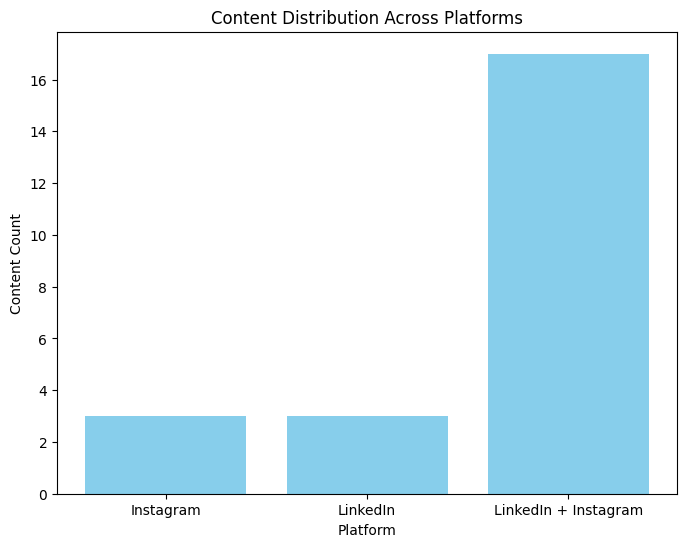

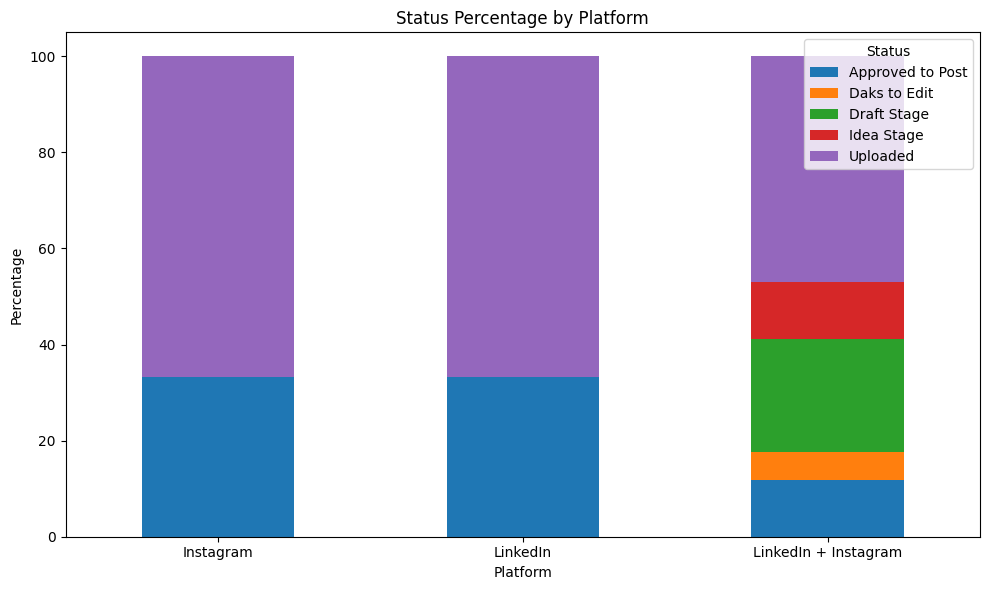

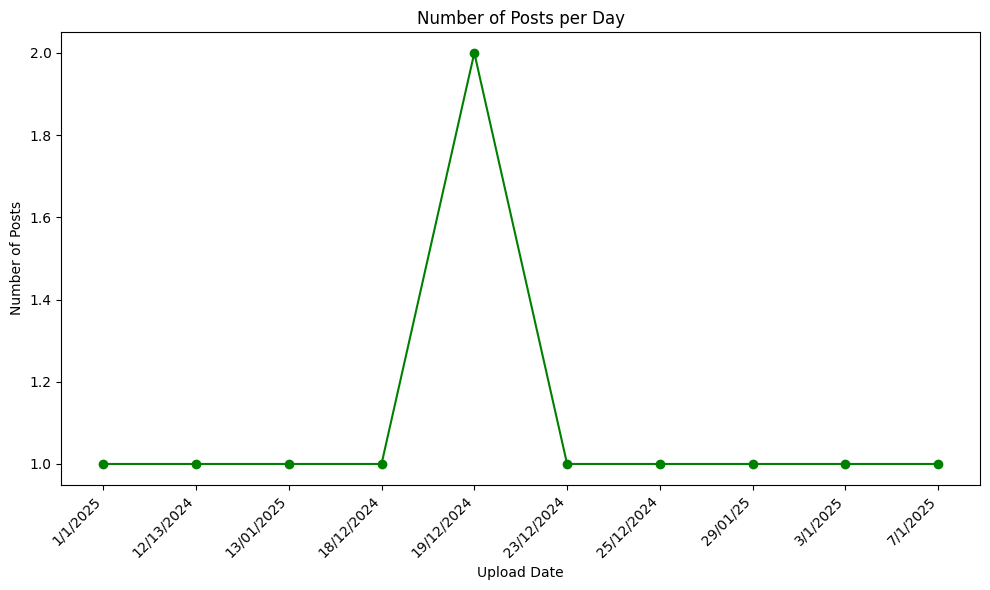

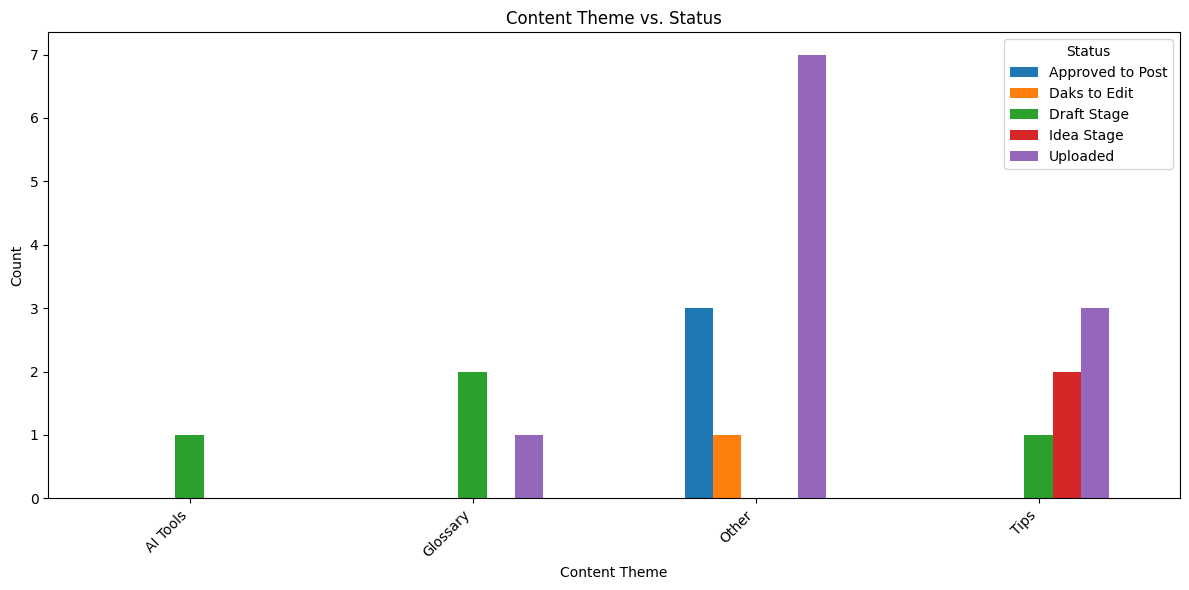

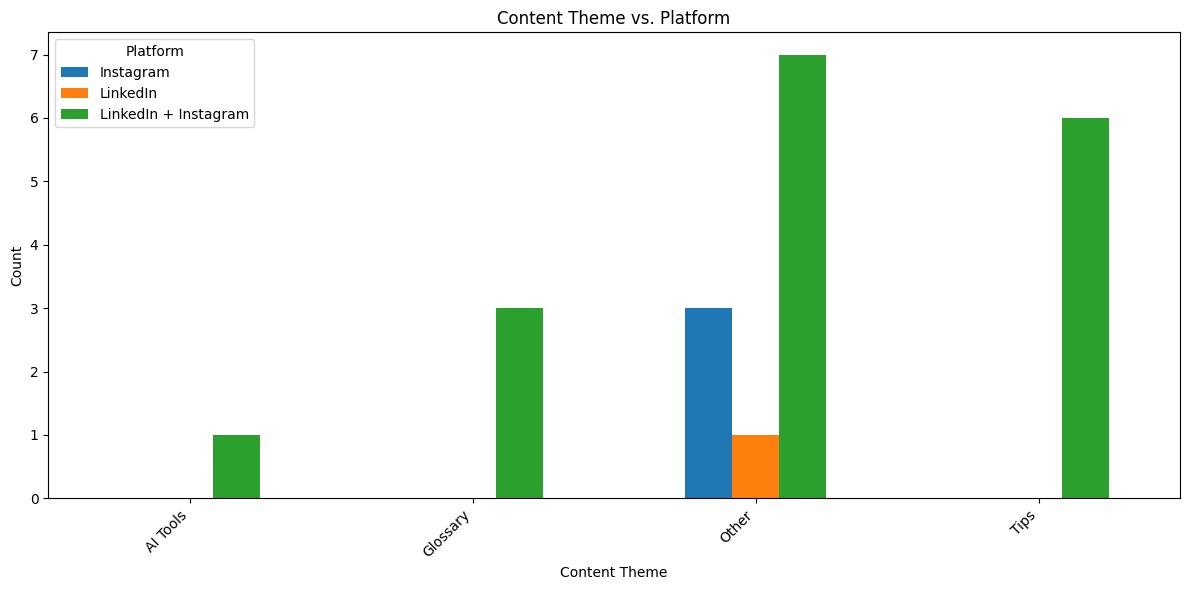

In [ ]:
import matplotlib.pyplot as plt

# 1. Content distribution across platforms
plt.figure(figsize=(8, 6))
plt.bar(platform_content_counts['Platform'], platform_content_counts['Content_Count'], color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Content Count')
plt.title('Content Distribution Across Platforms')
plt.show()

# 2. Relationship between 'Status' and 'Platform'
status_platform_percentage.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Status Percentage by Platform')
plt.ylabel('Percentage')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# 3. Upload date analysis
plt.figure(figsize=(10, 6))
plt.plot(posts_per_day.index, posts_per_day.values, marker='o', linestyle='-', color='green')
plt.xlabel('Upload Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Correlation between 'Content Theme' and 'Status'
content_theme_status_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Content Theme vs. Status')
plt.xlabel('Content Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# 5. Correlation between 'Content Theme' and 'Platform'
content_theme_platform_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Content Theme vs. Platform')
plt.xlabel('Content Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task.  However, the analysis implicitly addresses questions like:

* How is content distributed across different social media platforms?
* What is the relationship between post status and the platform it's posted on?
* How does the number of posts change over time?
* What are the correlations between content theme and other variables like status and platform?


### 2. Data Analysis Key Findings

* **Content Distribution:** The combined LinkedIn + Instagram platform had the most posts (17), followed by Instagram and LinkedIn (both with 3 posts).
* **Status-Platform Relationship:** The combined LinkedIn + Instagram platform shows a higher percentage of posts in the 'Draft Stage' (23.53%) compared to other platforms.  Instagram and LinkedIn have a higher percentage of posts that are 'Uploaded'.
* **Content Theme Analysis:** The 'Other' content theme has the highest count of 'Uploaded' posts.  Visualizations provide a clear view of the relationship between content themes and both status and platform.
* **Data Quality Issues:** The 'Upload date' column had inconsistent formatting, hindering a robust time-series analysis.

### 3. Insights or Next Steps

* **Improve Data Quality:** Prioritize cleaning and standardizing the 'Upload date' column to enable meaningful trend analysis over time. Investigate the high percentage of 'Draft Stage' posts on the combined LinkedIn + Instagram platform.
* **Deepen Content Theme Analysis:** Explore the reasons behind the high number of 'Uploaded' posts in the 'Other' content theme category. Further investigate the correlations between content themes and engagement metrics (if available).
